In [1]:
import os

#현재 폴더 경로; 작업 폴더 기준
print(os.getcwd())

C:\Users\user\Desktop\yolo\yolov5


In [11]:
plt.rcParams['font.family'] = 'Gulim'

# yolo 형식 맞게 변환

## png -> jpg 변환

In [2]:
# from PIL import Image
# import os

# # 입력 폴더와 출력 폴더 지정
# input_folder = './n_c'
# output_folder = './car_test'

# # 출력 폴더가 없으면 생성
# os.makedirs(output_folder, exist_ok=True)

# # 입력 폴더의 모든 파일에 대해 반복
# for filename in os.listdir(input_folder):
#     if filename.endswith('.png'):
#         # 이미지 열기 및 RGB로 변환
#         input_path = os.path.join(input_folder, filename)
#         im = Image.open(input_path).convert('RGB')
        
#         # 변환된 이미지를 동일한 파일 이름으로 JPEG로 저장
#         output_filename = os.path.splitext(filename)[0] + '.jpg'
#         output_path = os.path.join(output_folder, output_filename)
#         im.save(output_path, 'JPEG')

# print("변환이 완료되었습니다.")

## xml -> txt 변환

In [4]:
# import glob
# import os
# import pickle
# import xml.etree.ElementTree as ET
# from os import listdir, getcwd
# from os.path import join

# dirs = ['all_data']
# classes = ['licence']


# def getImagesInDir(dir_path):
#     image_list = []
#     for filename in glob.glob(dir_path + '/*.png'):
#         image_list.append(filename)
#     for filename in glob.glob(dir_path + '/*.jpg'):
#         image_list.append(filename)

#     return image_list


# def convert(size, box):
#     dw = 1./(size[0])
#     dh = 1./(size[1])
#     x = (box[0] + box[1])/2.0 - 1
#     y = (box[2] + box[3])/2.0 - 1
#     w = box[1] - box[0]
#     h = box[3] - box[2]
#     x = x*dw
#     w = w*dw
#     y = y*dh
#     h = h*dh
#     return (x,y,w,h)



# def convert_annotation(dir_path, output_path, image_path):
#     basename = os.path.basename(image_path)
#     basename_no_ext = os.path.splitext(basename)[0]

#     in_file = open(dir_path + '/' + basename_no_ext + '.xml' ,encoding='UTF8')
#     out_file = open(output_path + basename_no_ext + '.txt', 'w' ,encoding='UTF8')
#     tree = ET.parse(in_file)
#     root = tree.getroot()
#     size = root.find('size')
#     w = int(size.find('width').text)
#     h = int(size.find('height').text)

#     for obj in root.iter('object'):
#         difficult = obj.find('difficult').text
#         cls = obj.find('name').text
#         if cls not in classes or int(difficult)==1:
#             continue
#         cls_id = classes.index(cls)
#         xmlbox = obj.find('bndbox')
#         b = (float(xmlbox.find('xmin').text), float(xmlbox.find('xmax').text), float(xmlbox.find('ymin').text), float(xmlbox.find('ymax').text))
#         bb = convert((w,h), b)
#         out_file.write(str(cls_id) + " " + " ".join([str(a) for a in bb]) + '\n')



# cwd = getcwd()




# for dir_path in dirs:
#     full_dir_path = cwd + '/' + dir_path
#     output_path = full_dir_path +'/label/'
    

#     if not os.path.exists(output_path):
#         os.makedirs(output_path)

#     image_paths = getImagesInDir(full_dir_path)
#     print(full_dir_path)
#     list_file = open(full_dir_path + '.txt', 'w')

#     for image_path in image_paths:
#         list_file.write(image_path + '\n')
#         convert_annotation(full_dir_path, output_path, image_path)
        
#     list_file.close()

#     print("Finished processing: " + dir_path)


In [5]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu' # device 배정
torch.manual_seed(42)
if device == 'cuda':
  torch.cuda.manual_seed_all(42)
device

'cuda'

In [6]:
!nvidia-smi

Tue Nov 28 23:33:16 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.01                 Driver Version: 546.01       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090      WDDM  | 00000000:01:00.0 Off |                  Off |
|  0%   28C    P8              13W / 450W |      0MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# train

In [8]:
!python train.py --img 640 --batch 16 --epochs 50 --data data/car_dataset.yaml --cfg models/yolov5s.yaml --weights weights/yolov5s.pt --project ./output --name defects --exist-ok --device 0

train: weights=weights/yolov5s.pt, cfg=models/yolov5s.yaml, data=data/car_dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=./output, name=defects, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-247-g3f02fde Python-3.9.18 torch-2.1.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

# detect (Object detection 확인)

In [56]:
!python detect.py --source ./car_test/2_license.jpg --weights output/defects/weights/best.pt --conf 0.5
# 두개의 번호판 인식 코드
# source: 예측할 이미지 경로 입력
# 결과는 runs/detect/exp 폴더에 저장됨

detect: weights=['output/defects/weights/best.pt'], source=./car_test/2_license.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-247-g3f02fde Python-3.9.18 torch-2.1.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\user\Desktop\yolo\yolov5\car_test\2_license.jpg: 384x640 2 licenses, 46.6ms
Speed: 0.0ms pre-process, 46.6ms inference, 32.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp


In [ ]:
# !python detect.py --source ./car_test/2_license.jpg --weights output/defects/weights/best.pt --conf 0.7 --save-crop

## 폴더 내용에 대해 예측

In [4]:
import os

# car_test 디렉토리에 있는 모든 이미지 파일을 가져옴
image_directory = './car_test/'
image_files = [f for f in os.listdir(image_directory) if f.endswith('.jpg')]

# 모든 이미지에 대해 코드를 실행
for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)
    
    # 각 이미지에 대한 detect.py 코드 실행
    command = f"python detect.py --source {image_path} --weights output/defects/weights/best.pt --project ./output/crop_image --conf 0.7 --save-crop"
    os.system(command)

In [54]:
# import os
# import glob

# # 이미지가 있는 상위 폴더 경로
# base_folder = './output/crop_image/'

# # exp 폴더들의 패턴을 지정
# exp_folders = glob.glob(os.path.join(base_folder, 'exp*'))

# # 모든 exp 폴더에 대해 이미지 파일들을 가져오기
# for exp_folder in exp_folders:
#     # license 다음에 있는 이미지 폴더 경로 패턴
#     image_pattern = os.path.join(exp_folder, 'crops', 'license', '*.jpg')
    
#     # 이미지 파일들을 가져오기
#     image_files = glob.glob(image_pattern)
    
#     # 각 이미지에 대한 작업 수행
#     for image_file in image_files:
#         # 여기에 이미지 처리 코드 추가
#         print(f"Processing image: {image_file}")

# crop 이미지 예측

In [6]:
import os
import glob
import easyocr

# 이미지가 있는 상위 폴더 경로
base_folder = './output/crop_image/'

# OCR 모델 초기화
reader = easyocr.Reader(['ko', 'en'])

# exp 폴더들의 패턴을 지정
exp_folders = glob.glob(os.path.join(base_folder, 'exp*'))

# 모든 exp 폴더에 대해 이미지 파일들을 가져오기
for exp_folder in exp_folders:
    # license 다음에 있는 이미지 폴더 경로 패턴
    image_pattern = os.path.join(exp_folder, 'crops', 'license', '*.jpg')
    
    # 이미지 파일들을 가져오기
    image_files = glob.glob(image_pattern)
    
    # 각 이미지에 대한 작업 수행
    for image_file in image_files:
        # 이미지를 easyocr을 사용하여 텍스트로 읽기
        results = reader.readtext(image_file, detail=0)
        
        # 결과 출력
        print(f"Text in {image_file}: {results}")

Text in ./output/crop_image\exp\crops\license\1.jpg: ['26차  2861']
Text in ./output/crop_image\exp10\crops\license\18.jpg: ['3632428']
Text in ./output/crop_image\exp12\crops\license\2.jpg: ['HSCK29973']
Text in ./output/crop_image\exp13\crops\license\3.jpg: ['192', '7777']
Text in ./output/crop_image\exp14\crops\license\4.jpg: ['[15273108']
Text in ./output/crop_image\exp15\crops\license\5.jpg: ['FJ BB5 MS']
Text in ./output/crop_image\exp16\crops\license\6.jpg: ['lOB G326E']
Text in ./output/crop_image\exp17\crops\license\7.jpg: ['OHy', '304']
Text in ./output/crop_image\exp18\crops\license\8.jpg: ['EL15211']
Text in ./output/crop_image\exp19\crops\license\9.jpg: ['03y', '5085']
Text in ./output/crop_image\exp2\crops\license\10.jpg: ['DF M552']
Text in ./output/crop_image\exp3\crops\license\11.jpg: ['1110때 ,']
Text in ./output/crop_image\exp5\crops\license\13.jpg: ['ME', 'H1405', 'MIMWAKGE']
Text in ./output/crop_image\exp6\crops\license\14.jpg: ['13서', '6015리']
Text in ./output/crop

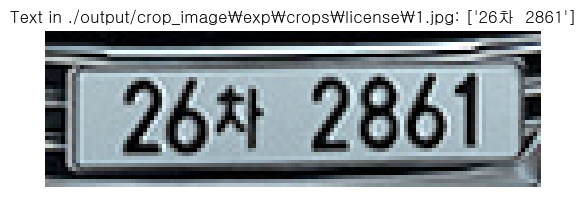

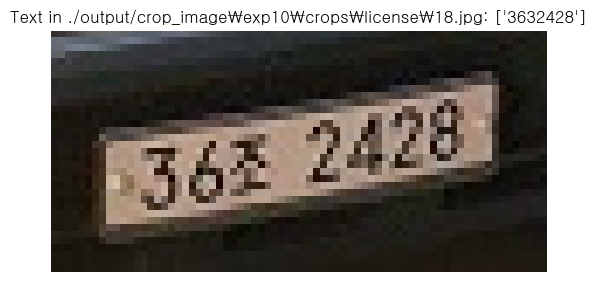

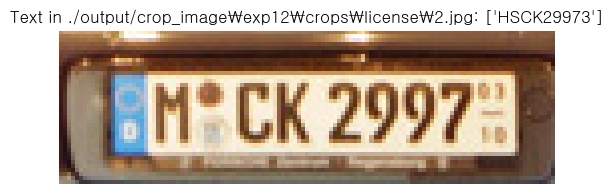

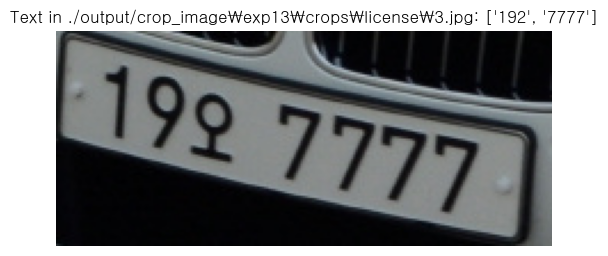

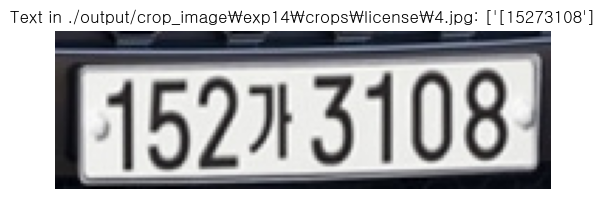

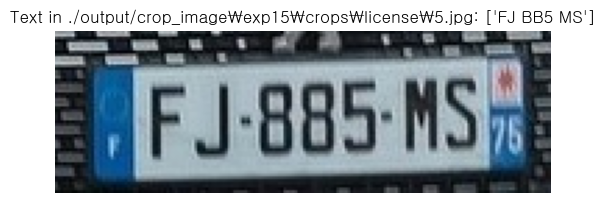

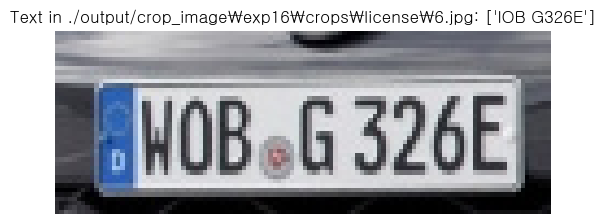

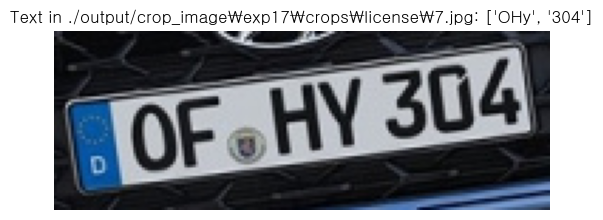

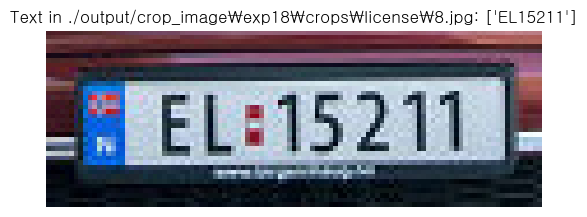

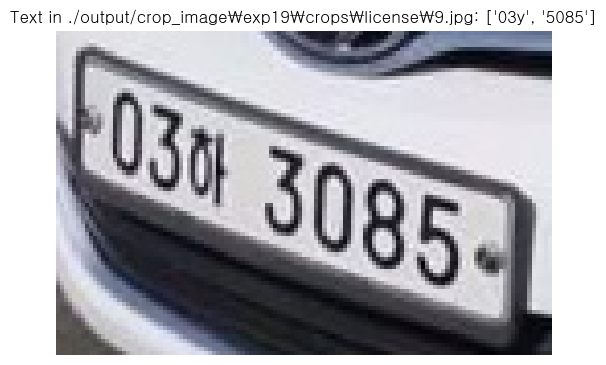

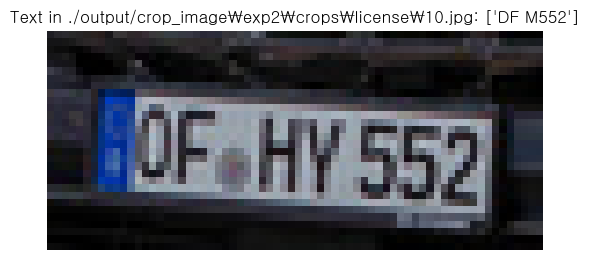

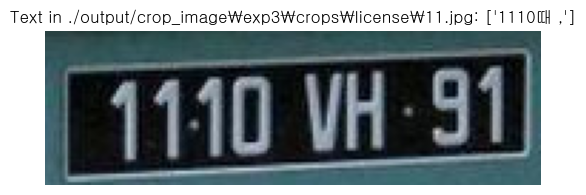

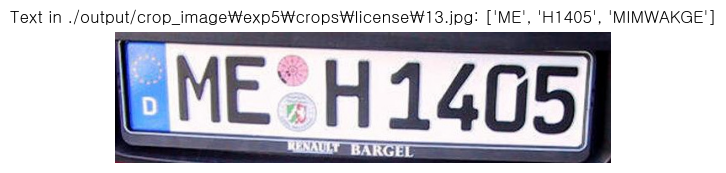

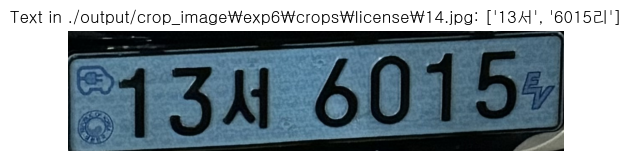

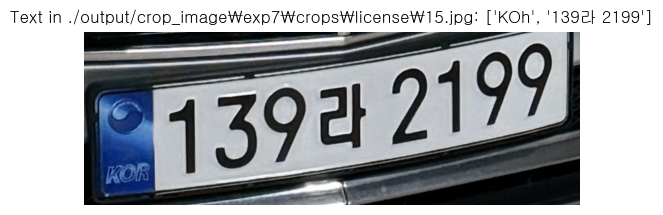

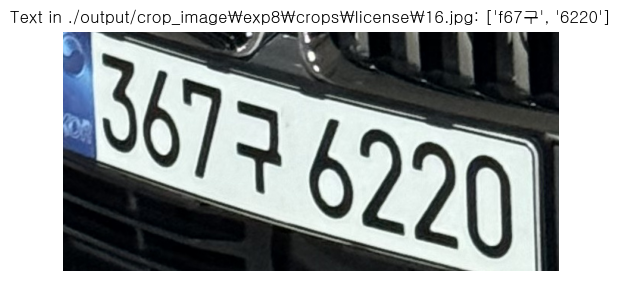

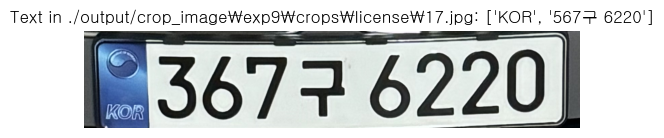

In [10]:
import os
import glob
import easyocr
import cv2
import matplotlib.pyplot as plt

# 이미지가 있는 상위 폴더 경로
base_folder = './output/crop_image/'

# OCR 모델 초기화
reader = easyocr.Reader(['ko', 'en'])

# exp 폴더들의 패턴을 지정
exp_folders = glob.glob(os.path.join(base_folder, 'exp*'))

# 모든 exp 폴더에 대해 이미지 파일들을 가져오기
for exp_folder in exp_folders:
    # license 다음에 있는 이미지 폴더 경로 패턴
    image_pattern = os.path.join(exp_folder, 'crops', 'license', '*.jpg')
    
    # 이미지 파일들을 가져오기
    image_files = glob.glob(image_pattern)
    
    # 각 이미지에 대한 작업 수행
    for image_file in image_files:
        # 이미지를 easyocr을 사용하여 텍스트로 읽기
        results = reader.readtext(image_file, detail=0)
        
        # 이미지 띄우기
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        plt.imshow(image)
        plt.title(f"Text in {image_file}: {results}")
        plt.axis('off')
        plt.show()

# crop 이미지 처리 방법

In [ ]:
# -----------------------------------------------------------------------------------

In [52]:
import numpy as np
import cv2

src = cv2.imread('./output/crop_image/exp7/crops/license/15.jpg', 1)

# grayscale
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# canny
canned = cv2.Canny(gray, 0, 300)

# dilate to close holes in lines
kernel = np.ones((3,1),np.uint8) # 가로 1 세로 10
mask = cv2.dilate(canned, kernel, iterations = 50)

# contours 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 가장 큰 contours 찾기
biggest_cntr = None
biggest_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > biggest_area:
        biggest_area = area
        biggest_cntr = contour

# 외곽 box
rect = cv2.minAreaRect(biggest_cntr)
box = cv2.boxPoints(rect)
box = np.intp(box)

# 외곽 box 그리기
src_box = src.copy()
cv2.drawContours(src_box, [box], 0, (0, 255, 0), 3)

# angle 계산
angle = rect[-1]
if angle > 30:
    angle = -(90 - angle)

# 기울기 조정
rotated = src.copy()
(h, w) = rotated.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(rotated, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# 회전된 박스 좌표 찾기
ones = np.ones(shape=(len(box), 1))
points_ones = np.hstack([box, ones])
transformed_box = M.dot(points_ones.T).T

y = [transformed_box[0][1], transformed_box[1][1], transformed_box[2][1], transformed_box[3][1]]
x = [transformed_box[0][0], transformed_box[1][0], transformed_box[2][0], transformed_box[3][0]]

y1, y2 = int(min(y)), int(max(y))
x1, x2 = int(min(x)), int(max(x))

# crop
crop = rotated[y1:y2, x1:x2]

# 흑백처리
gray2 = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)


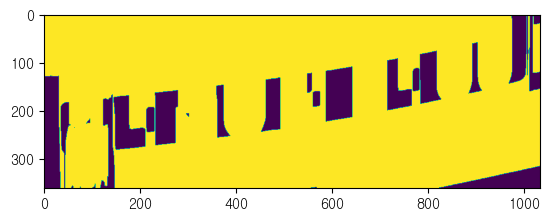

In [53]:
plt.imshow(mask)

In [93]:
import easyocr
reader = easyocr.Reader(['ko'])
results = reader.readtext(gray2, detail=0)
print(results)

['03/', '5085 ']
